In [ ]:
!pip install geopandas

# Fonksiyonlar

In [ ]:
# Libs
from shapely.geometry import Point, Polygon, LineString, MultiLineString
from random import randint
import matplotlib.pyplot as plt
import geopandas as gpd
from math import tan, sqrt
import numpy as np


In [ ]:
# Ana Çizgiler
def main_lines(size):
  coords_square = [(0,0), (size,0), (size,size), (0,size), (0,0)]
  square = LineString(coords_square)

  gap = size/5

  line_coords = [[(0,gap),(size,gap)],
                [(0,2*gap),(size,2*gap)],
                [(0,3*gap), (size,3*gap)],
                [(0,4*gap), (size,4*gap)]]

  lines = [LineString(line_coords[0]),
           LineString(line_coords[1]),
           LineString(line_coords[2]),
           LineString(line_coords[3]),
           square]
  
  return lines


# Çember yardımıyla rastegele çizgi
def random_lines_circle(l, size):
  coords_square = [(0,0), (size,0), (size,size), (0,size)]
  square = Polygon(coords_square)

  while True:
    temp_x, temp_y = randint(0,size), randint(0,size)
    if square.contains(Point(temp_x, temp_y)):
        point1 = Point(temp_x, temp_y)
        
        degree = randint(0,359)

        x1 = sqrt((l**2/(tan(degree)**2+1)))
        y1 = tan(degree) * x1
        if degree == 0 or degree == 90 or degree == 180 or degree == 270:
          if degree==0:
            point2_x = temp_x + l 
            point2_y = temp_y
          
          elif degree==90:
            point2_x = temp_x  
            point2_y = temp_y + l
          
          elif degree==180:
            point2_x = temp_x - l
            point2_y = temp_y
          
          elif degree==270:
            point2_x = temp_x 
            point2_y = temp_y - l
        else:  
          if degree < 90:
            point2_x = temp_x + x1 
            point2_y = temp_y + y1

          elif degree < 180 and degree > 90:
            point2_x = temp_x + x1 
            point2_y = temp_y + y1

          elif degree < 270 and degree > 180:
            point2_x = temp_x + x1 
            point2_y = temp_y + y1

          elif degree < 360 and degree > 270:
            point2_x = temp_x + x1 
            point2_y = temp_y + y1
          
        if square.contains(Point(point2_x, point2_y)):
          return LineString([(temp_x, temp_y), (point2_x, point2_y)])

# Çizgiler Kesişiyor mu?
def is_cross(line1,line2):
  if line2.intersects(line1) == True:
    return True
  else:
    return False

# Main

In [ ]:
import seaborn as sns

size = 100
mains = main_lines(size)
l = size/10

counts = list()
count = np.arange(100,1000,10)
for count in count:
  counter = 0
  for i in range(count): 
    for main in mains:
      line =  random_lines_circle(l,size)
      if is_cross(main, line) == True:
        counter += 1
  counts.append(counter/count)

sns.set(rc={'figure.figsize':(32,8)})
sns.lineplot(y = counts, x = np.arange(len(counts)))

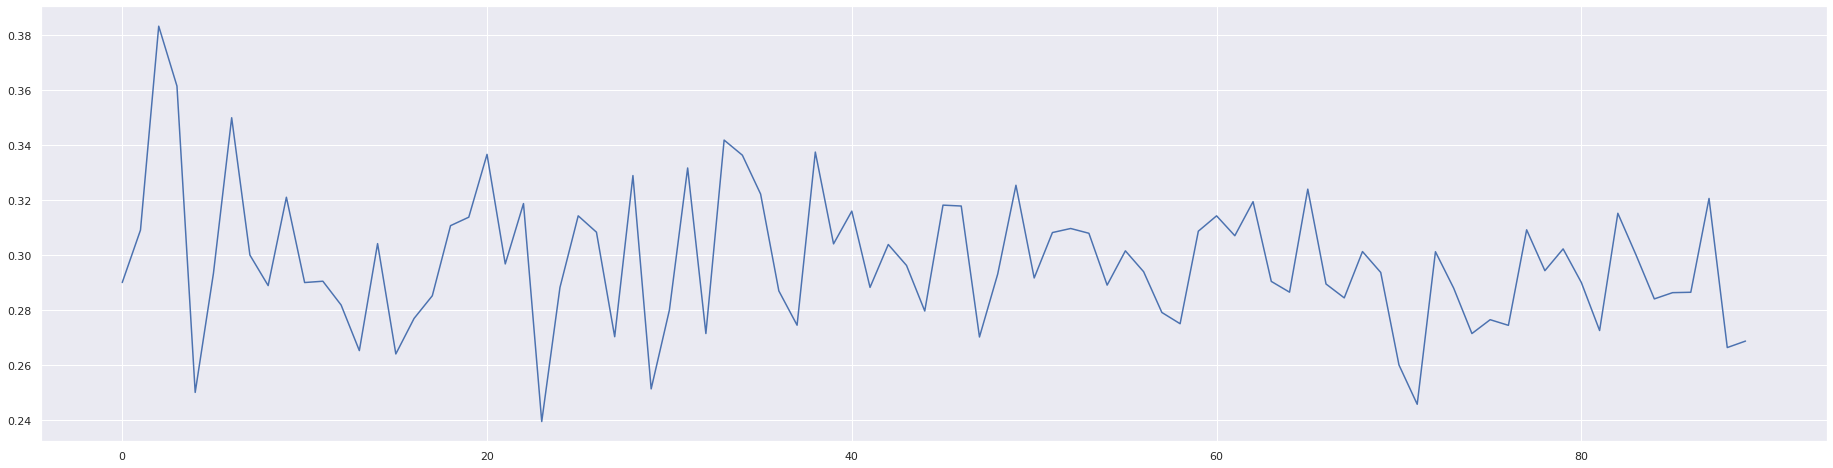